In [1]:

import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy.optimize import minimize

## 6.2

In [2]:
f = np.array([10,20,30,40,50,60,70,80,90,100,110])
V = np.array([16,45,64,75,70, 115, 142, 167, 183,160, 221])
e = np.array([5,5,5,5,30,5,5,5,5,30,5])

In [5]:
w = 1/(e**2)

sum_w = w.sum()
sum_wx = (w*f).sum()
sum_wy = (w*V).sum()
sum_wxx = (w*f**2).sum()
sum_wxy = (w*f*V).sum()

m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

print('Pendiente:',m)
print('Error Pendiente:',m_std_err)
print('Intercepto:',b)
print('Error Intercepto:',b_std_err)




Pendiente: 2.0284648216102745
Error Pendiente: 0.05197830827721802
Intercepto: -0.9474964662767381
Error Intercepto: 3.386858673521736


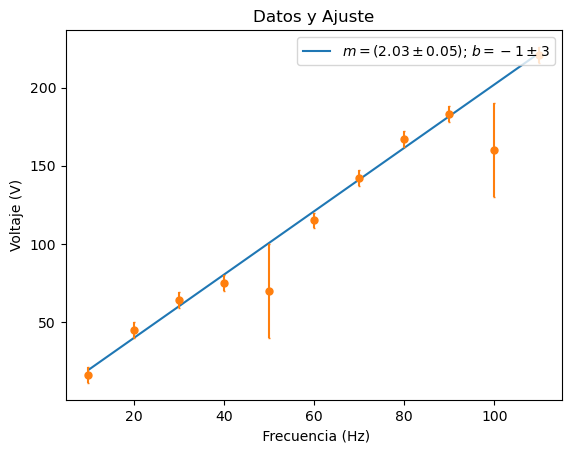

In [10]:
x = np.linspace(10, 110, 1000)
y = m*x+b

plt.plot(x, y, label = r"$m = (2.03\pm 0.05)$" + "; " + r"$b = -1\pm 3$")
plt.errorbar(f, V, e, fmt="o", markersize=5, capsize=1)

plt.title("Datos y Ajuste")
plt.xlabel(" Frecuencia (Hz)")
plt.ylabel("Voltaje (V)")
plt.legend(loc="upper right")

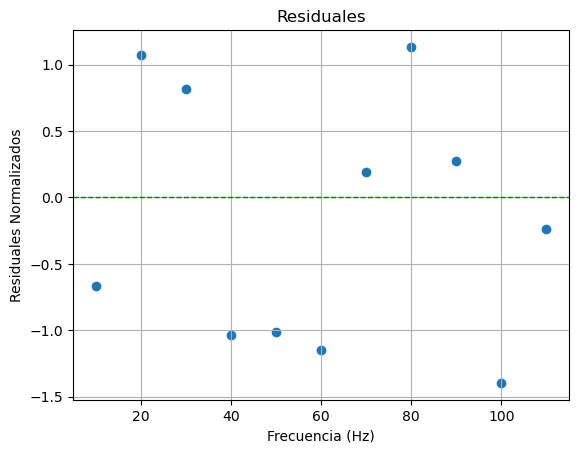

In [11]:

model = m*f+b
res = (V - model)/e

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(f, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_title('Residuales')
ax2.grid()


In [14]:
def DurbinWatson(R):
    return (np.sum((R[1:]-R[:-1])**2))/(np.sum(R**2))

DurbinWatson(res)

1.5517903818095427

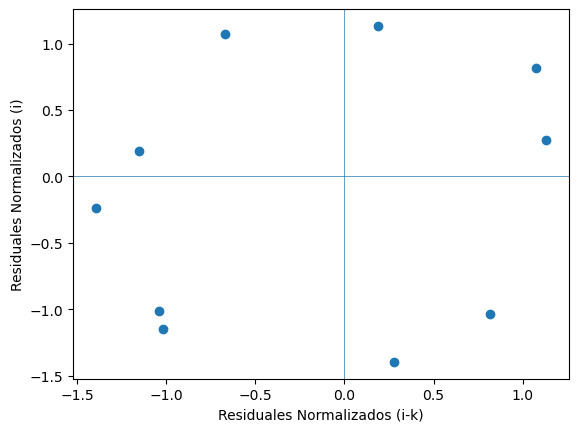

In [15]:
plt.scatter(res[:-1],res[1:])
plt.ylabel("Residuales Normalizados (i)")
plt.xlabel("Residuales Normalizados (i-k)")
plt.axhline(y = 0, linewidth=0.5)
plt.axvline(x=0, linewidth=0.5)